# **Supervised Learning - Classification**



In [1]:
# Importing libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [3]:
# Creating DataFrame 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], ignore_index=True, sort  = False)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(1309, 12)

In [6]:
train.shape

(891, 12)

## **Dataset Description ( Kaggle )**
### **Overview**
The data has been split into two groups:

* training set (train.csv)

* test set (test.csv)

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### **Data Dictionary**
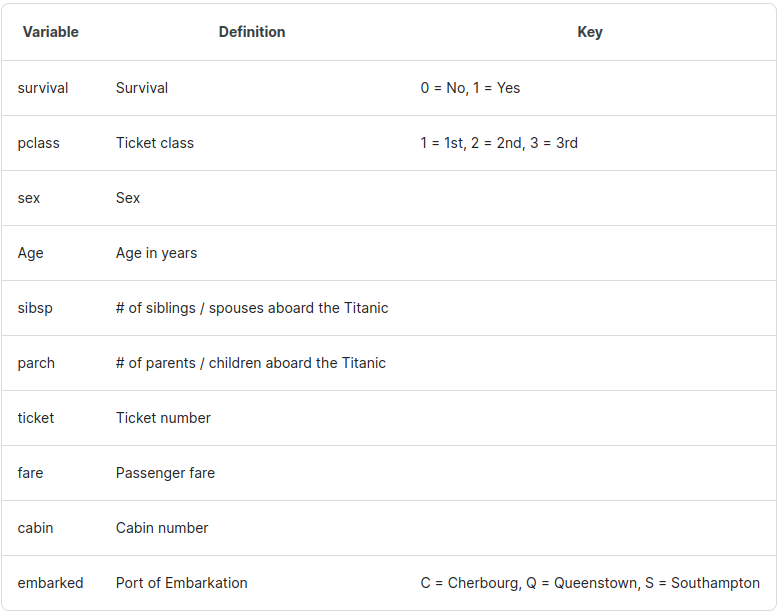

#### **Variable Notes**
**pclass** : A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age** : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp** : The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch** : The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Text(0.5, 1.0, 'Missing values heatmap')

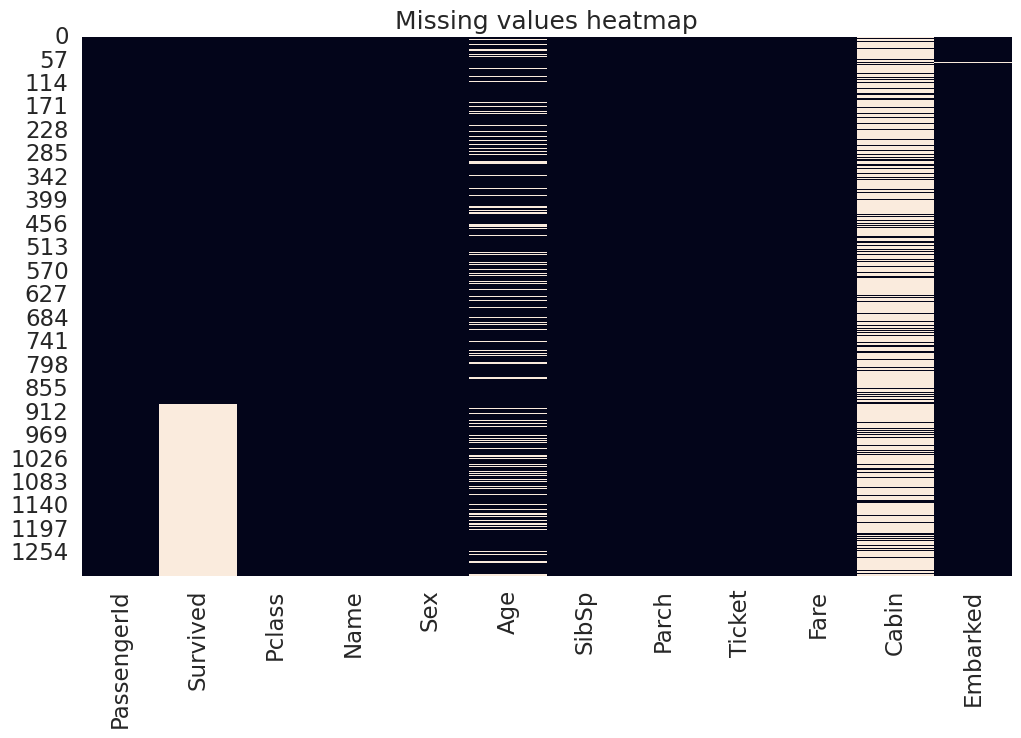

In [7]:
# Visualizing missing data
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

The dataset had a couple of columns that were missing values. The ‘Cabin’ attribute had 1014 missing values. The column ‘Embarked’ that depicted a commuter’s boarding point had a total of 2 missing values. The property ‘Age’ had 263 missing values, and the column ‘Fare’ had one.



In [8]:
# To understand the categorical and non-categorical features, I had a look at the number of unique values each column had. 
# The attributes ‘Sex’ and ‘Survived’ had two possible values, properties ‘Embarked’ & ‘Pclass’ had three possible values.
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Text(0.5, 1.0, 'Training Data - Percentage of people survived and Deceased')

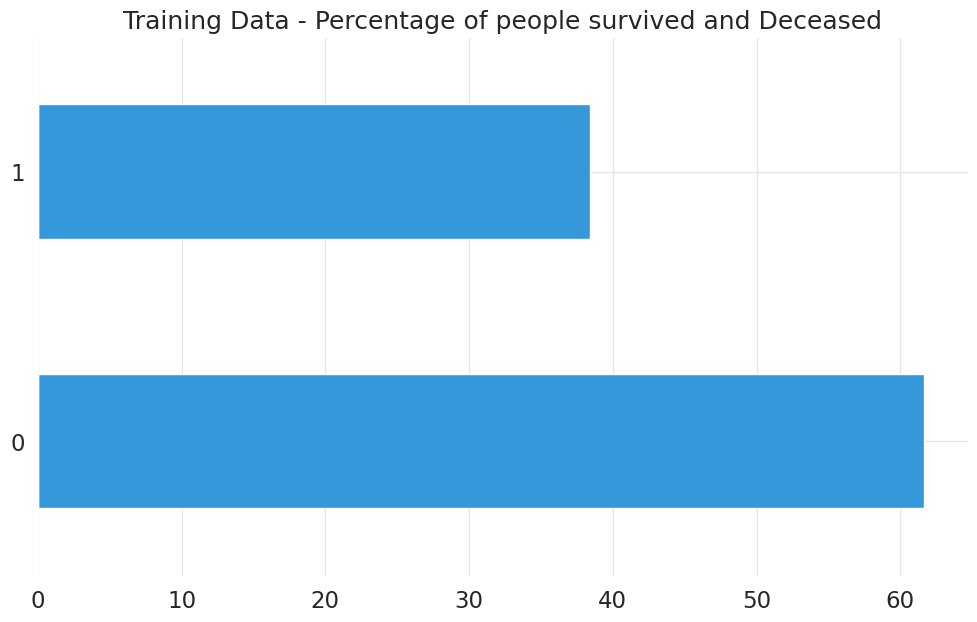

In [9]:
(train.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Training Data - Percentage of people survived and Deceased")

## **Analysis**

### **1. Class**

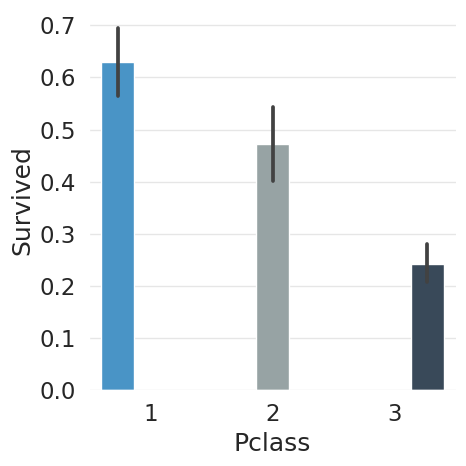

In [10]:
sns.catplot(data=train, x="Pclass", y="Survived", hue="Pclass", kind="bar")

The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler

### **2. Gender / Sex**

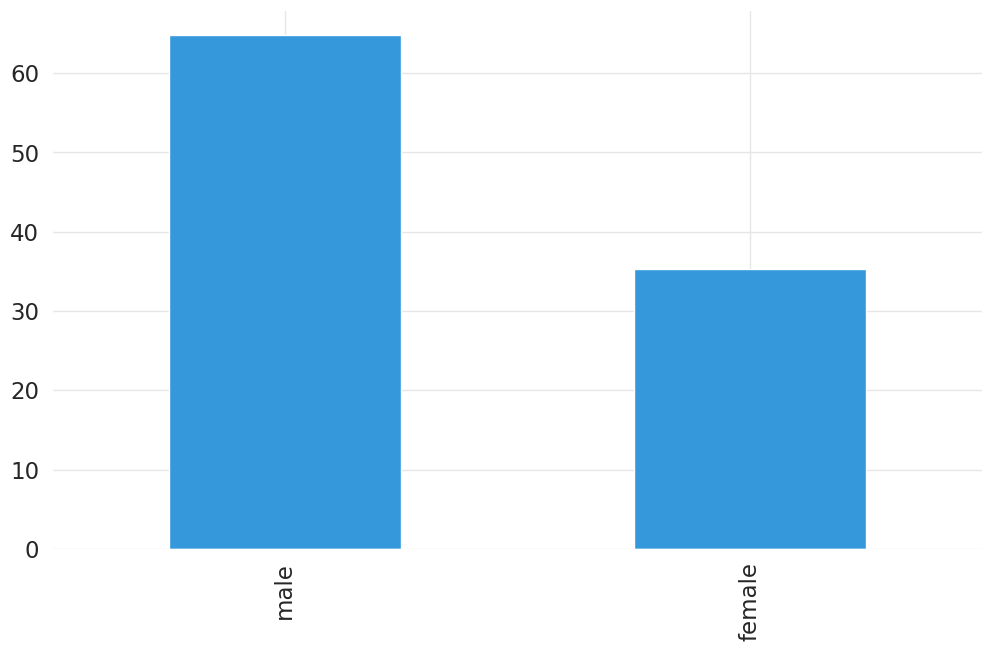

In [11]:
fig_sex = (train.Sex.value_counts(normalize = True) * 100).plot.bar()

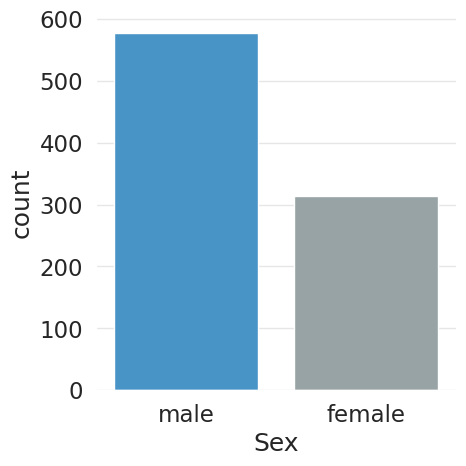

In [12]:
sns.catplot(data=train, x="Sex", kind="count")

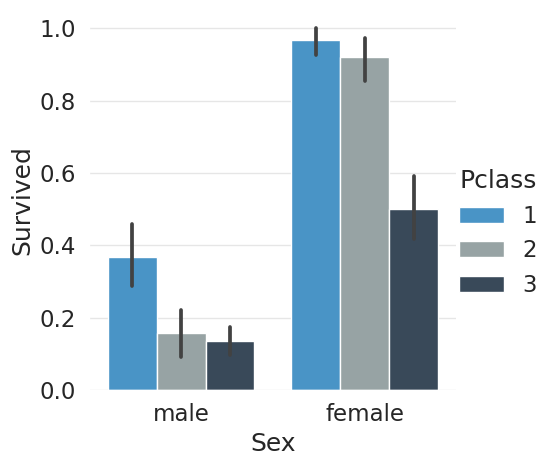

In [13]:
sns.catplot(data=train, x="Sex", y="Survived", hue="Pclass", kind="bar")

Roughly around 65% of the tourists were male while the remaining 35% were female. However, the percentage of female survivors was higher than the number of male survivors. More than 80% male passengers had to die as compared to around 70% female passengers.

We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

### **3. Age**

In [14]:
pd.DataFrame(df.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


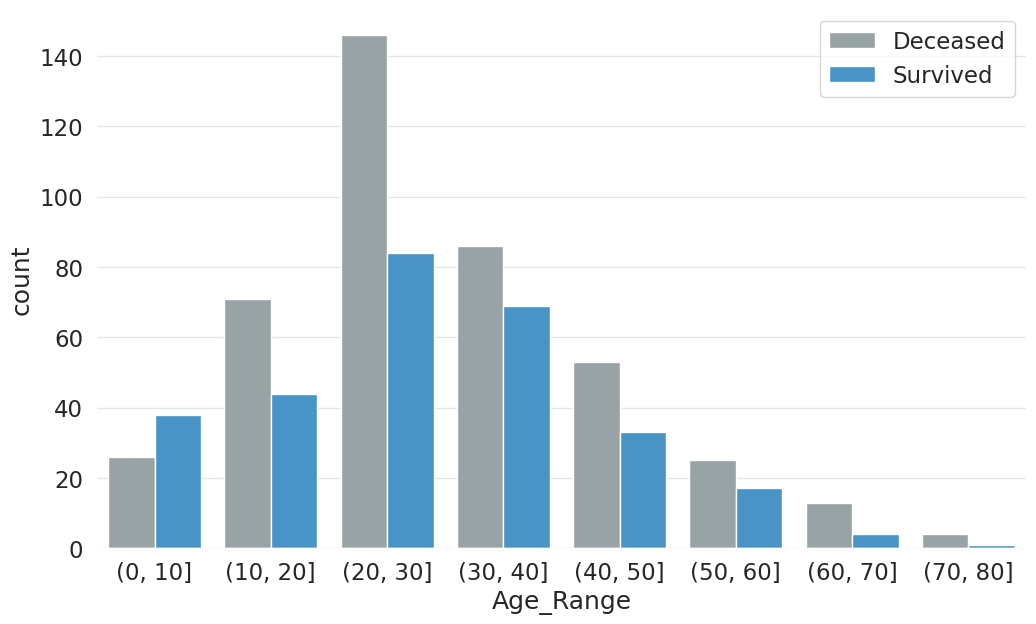

In [15]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

The description of column 'Age' tells us that the youngest traveler onboard was aged around 2 months and the oldest commuter was 80 years. The average age of passengers onboard was just under 30 years. However, it must be remembered that these observations are with missing values. Since we know that the oldest passenger was 80, we can plot age range and number of people survived or died for that age range.

Apparently, higher number of children below age 10 were saved than died. For every other age group, the number of casualities was higher than the number of survivors. More than 140 people within the age group 20 and 30 were dead as compared to just around 80 people of the same age range sustained.

### **4. SibSp**

In [16]:
df.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [17]:
ss = pd.DataFrame()
ss['survived'] = train.Survived
ss['sibling_spouse'] = pd.cut(train.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)

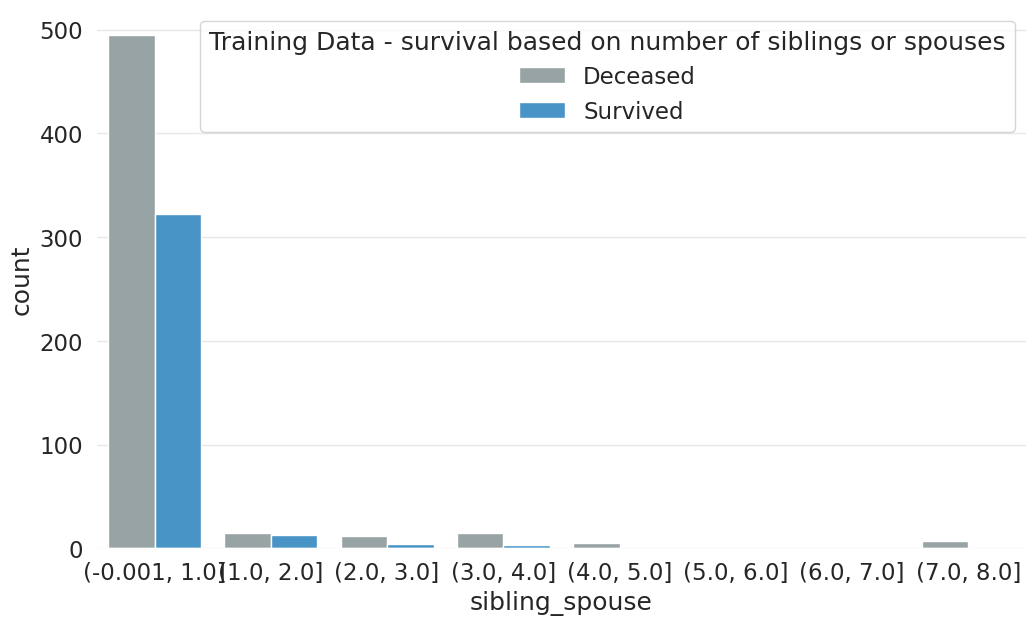

In [18]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = ss, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - survival based on number of siblings or spouses")

SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the tourists.

More than 90% people traveled alone or with one of their sibling or spouse.

The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

### **5. Parch**

In [19]:
pd.DataFrame(df.Parch.describe())

,Parch
count,1309.000000
mean,0.385027
std,0.865560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


In [20]:
pc = pd.DataFrame()
pc['survived'] = train.Survived
pc['parents_children'] = pd.cut(train.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)

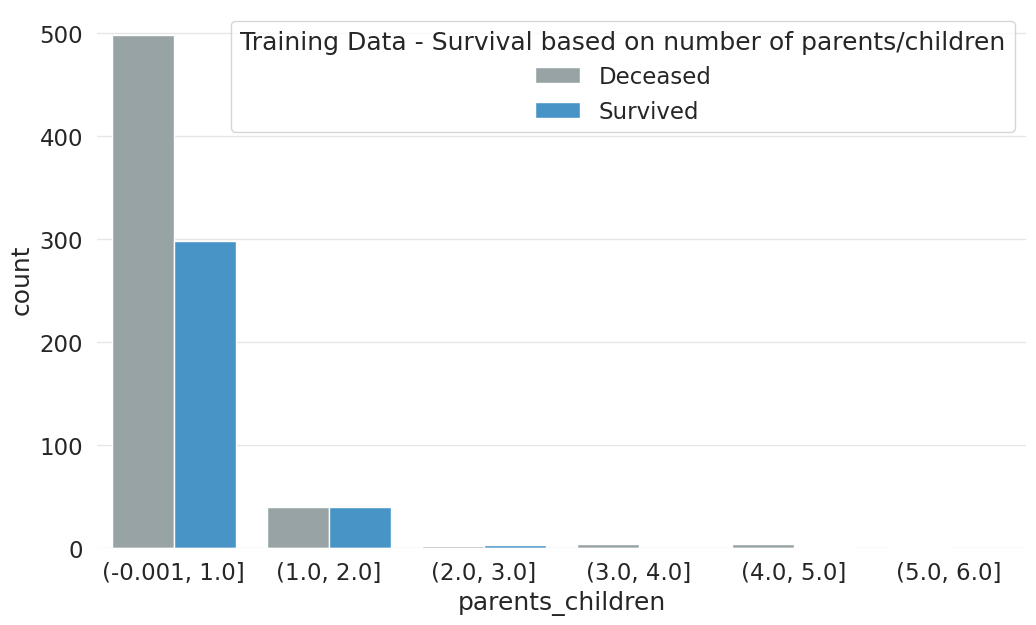

In [21]:
x = sns.countplot(x = "parents_children", hue = "survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - Survival based on number of parents/children")

Similar to the SibSp, this feature contained the number of parents or children each passenger was traveling with. A maximum of 9 parents/children traveled along with one of the passenger.

We will create two new columns, a column named family will have the sum of the number of siblings/spouse and number of parents/children.

People traveling alone had higher chances of survival. So, we also create a column Is_Alone

In [22]:
df['Family'] = df.Parch + df.SibSp
df['Is_Alone'] = df.Family == 0

### **6. Ticket**

We won't consider this feature as it gives no information regarding survival 

### **7. Fare**

In [23]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [24]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])

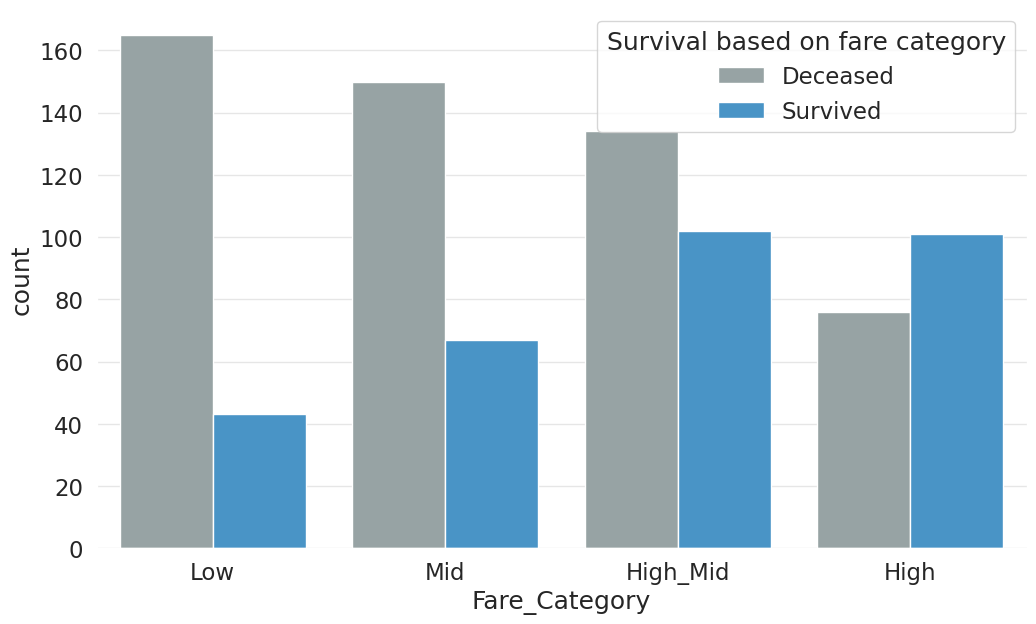

In [25]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")

It is clear that there is a strong correlation between the fare and the survival. The higher a tourist paid, the higher would be his chances to survive.

### **8. Embarked**

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

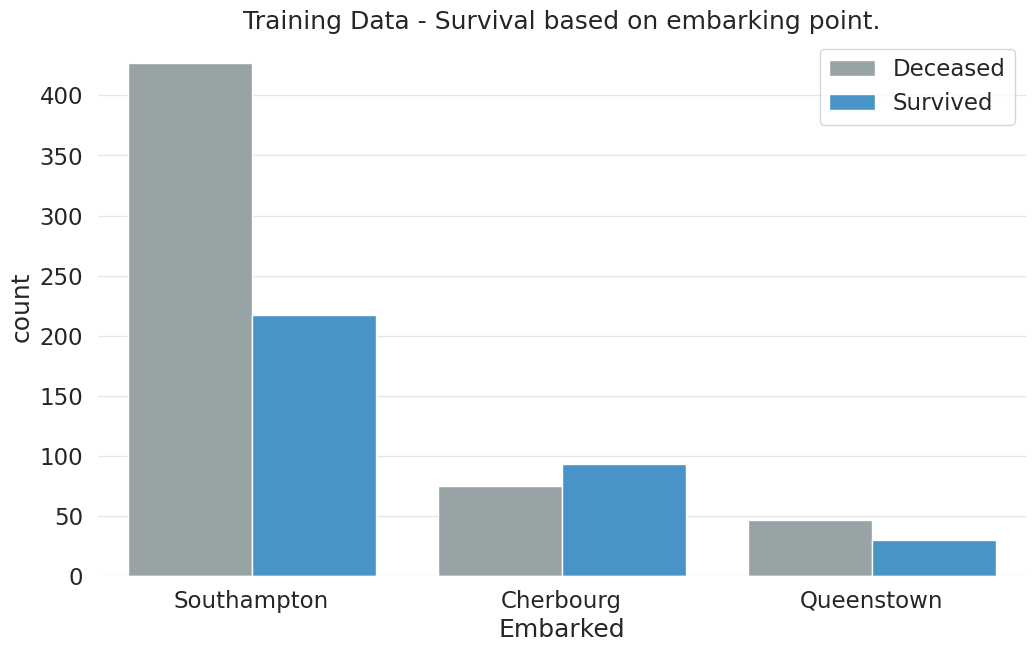

In [26]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = train, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Training Data - Survival based on embarking point.")

Embarked signifies where the traveler boarded from. There are three possible values for Embark - Southampton,Cherbourg,Queenstown.

In combined data, more than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

More People who boarded from Cherbourg survived than those who died

### **9. Cabin**

As Cabin has a lot of missing values, we will impute it in following section and then use it for prediction.

## **Data Imputation**

**Age**

Age has 263 missing values. To deal with missing values, we first try to categorise the people with their titles. There are 17 different titles in the training data. We group the titles and sex and then we find the median of all the categories and replace the missing values with the median of that category.

In [27]:
df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
df.Salutation.nunique()
# # wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(td.Salutation.values))
# # plt.imshow(wc, interpolation = 'bilinear')
# # plt.axis('off')
# # plt.tight_layout(pad=0)
# # plt.show()

df.Salutation.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Salutation, dtype: int64

In [28]:
grp = df.groupby(['Sex', 'Pclass'])  
df.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#If still any row remains
df.Age.fillna(df.Age.median, inplace = True)

<ipython-input-28-e5c23f255610>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.Age = grp.Age.apply(lambda x: x.fillna(x.median()))


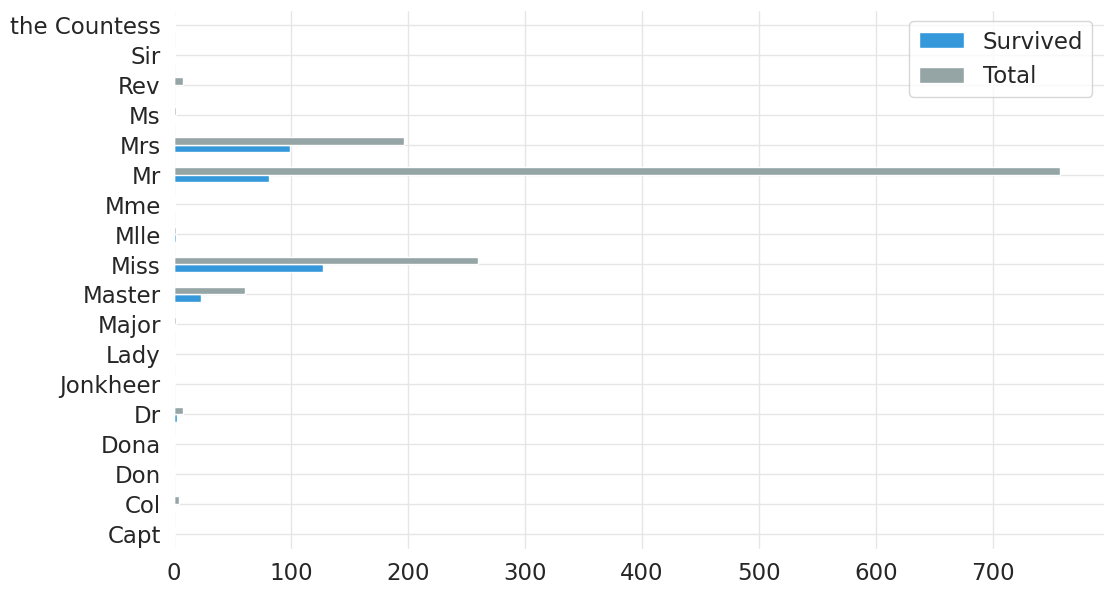

In [29]:
sal_df = pd.DataFrame({
    "Survived":
    df[df.Survived == 1].Salutation.value_counts(),
    "Total":
        df.Salutation.value_counts()
})
s = sal_df.plot.barh()

**Embarked**

Since embarked only has two missing values and the highest number of people boarded the ship from Southampton, the probablity of boarding from Southampton is high. So, we fill the missing values with Southampton. However, instead of manually putting in Southampton, we would find the mode of the Embarked column and substitute missing values with it.

In [30]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

**Cabin**

Assigning NA for non available cabin values. Pulling deck value from Cabin and adding a feature 'Deck'

In [31]:
df.Cabin = df.Cabin.fillna('NA')

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family,Is_Alone,Fare_Category,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,"(20, 30]",1,False,Low,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",1,False,High,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,"(20, 30]",0,True,Mid,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",1,False,High,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,"(30, 40]",0,True,Mid,Mr


## **Encoding and dropping columns**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
#df = pd.concat([df,pd.get_dummies(df.Cabin, prefix="Cabin"),pd.get_dummies(df.Age_Range, prefix="Age_Range"), pd.get_dummies(df.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(df.Salutation, prefix="Title", drop_first = True),pd.get_dummies(df.Fare_Category, prefix="Fare", drop_first = True), pd.get_dummies(df.Pclass, prefix="Class", drop_first = True)], axis=1)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Is_Alone'] = LabelEncoder().fit_transform(df['Is_Alone'])

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family,Is_Alone,Fare_Category,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,S,"(20, 30]",1,0,Low,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",1,0,High,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,"(20, 30]",0,1,Mid,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",1,0,High,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,S,"(30, 40]",0,1,Mid,Mr


In [36]:
df.drop(['Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch','Family'], axis=1, inplace=True)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Is_Alone
0,1,0.0,3,1,22.0,0
1,2,1.0,1,0,38.0,0
2,3,1.0,3,0,26.0,1
3,4,1.0,1,0,35.0,0
4,5,0.0,3,1,35.0,1


Reference : https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

## **Training**

In [38]:
# Data to be predicted
X_to_be_predicted = df[df.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = df
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28

(891, 6)

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Is_Alone
0,1,0.0,3,1,22.0,0
1,2,1.0,1,0,38.0,0
2,3,1.0,3,0,26.0,1
3,4,1.0,1,0,35.0,0
4,5,0.0,3,1,35.0,1


In [40]:
X_train = train_data[['Pclass', 'Sex', 'Age','Is_Alone']]
y_train = train_data['Survived']

In [41]:
X_train.head()

,Pclass,Sex,Age,Is_Alone
0,3,1,22.0,0
1,1,0,38.0,0
2,3,0,26.0,1
3,1,0,35.0,0
4,3,1,35.0,1


In [42]:
X_to_be_predicted.head()

,PassengerId,Pclass,Sex,Age,Is_Alone
891,892,3,1,34.5,1
892,893,3,0,47.0,0
893,894,2,1,62.0,1
894,895,3,1,27.0,1
895,896,3,0,22.0,0


In [43]:
X_test= X_to_be_predicted[['Pclass', 'Sex', 'Age','Is_Alone']]

In [44]:
X_test.head()

,Pclass,Sex,Age,Is_Alone
891,3,1,34.5,1
892,3,0,47.0,0
893,2,1,62.0,1
894,3,1,27.0,1
895,3,0,22.0,0


### **Naive Bayes Algorithm**

    P( y | x ) = { P( y ) * P( x | y ) } / P( x )

where, 

P( y | x ) - posterior

P( y ) - likelihood

P( x | y ) - prior

P( x ) - evidence

In [45]:
class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.posteriors = {}
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        
        # Calculate class priors
        for c in self.classes:
            self.priors[c] = np.sum(y == c) / float(num_samples)
        
        # Calculate feature likelihoods
        for feature in range(num_features):
            for c in self.classes:
                X_c = X[y == c]
                self.posteriors[(feature, c)] = {
                    'mean': np.mean(X_c[:, feature]),
                    'std': np.std(X_c[:, feature])
                }
    
    def predict(self, X):
        num_samples = X.shape[0]
        predictions = []
        
        for i in range(num_samples):
            posterior_probs = []
            
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = 0
                
                for feature in range(X.shape[1]):
                    mean = self.posteriors[(feature, c)]['mean']
                    std = self.posteriors[(feature, c)]['std']
                    x = X[i, feature]
                    
                    likelihood += np.log(self.calculate_probability(x, mean, std))
                
                posterior_prob = prior + likelihood
                posterior_probs.append(posterior_prob)
            
            # Predict the class with the highest posterior probability
            predicted_class = self.classes[np.argmax(posterior_probs)]
            predictions.append(predicted_class)
        
        return predictions
    
    def calculate_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean)**2 / (2 * std**2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [46]:
# Create and train the Naive Bayes model
model1 = NaiveBayes()
model1.fit(X_train.values, y_train.values)

# Accuracy on Train set
predictions = model1.predict(X_train.values)
accuracy = np.mean(predictions == y_train.values)
print('Accuracy:', accuracy)

Accuracy: 0.7800224466891134


In [47]:
# Predictions on test set
predictions = model1.predict(X_test.values)

In [48]:
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':predictions})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Naive_Bayes_Titanic_Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Naive_Bayes_Titanic_Predictions.csv


### **k - Nearest Neighbours ( kNN ) Algorithm**

In [49]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        num_samples = X.shape[0]
        y_pred = np.zeros(num_samples, dtype=int)
        
        for i in range(num_samples):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            sorted_indices = np.argsort(distances)
            k_nearest_labels_f = self.y_train[sorted_indices[:self.k]]             ## float array
            k_nearest_labels = [int(x) for x in k_nearest_labels_f]                ## array converted to type int
            y_pred[i] = np.argmax(np.bincount(k_nearest_labels))

        ## other way could be using np.linalg.norm to compute distances
        
        return y_pred

For simplification , considering only class , sex and age to predict

In [50]:
X_train = X_train[['Pclass', 'Sex', 'Age']]

In [51]:
X_train.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [52]:
X_test = X_test[['Pclass', 'Sex', 'Age']]

In [53]:
# Create and train the KNN model
model2 = KNN(k=5)
model2.fit(X_train.values, y_train.values)

In [54]:
# Accuracy on the train set
predictions2 = model2.predict(X_train.values)
accuracy = np.mean(predictions2 == y_train.values)
print('Accuracy:', accuracy)

Accuracy: 0.8204264870931538


In [55]:
# Predictions on test set
predictions2 = model2.predict(X_test.values)

In [56]:
submission2 = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':predictions2})
submission2.Survived = submission2.Survived.astype(int)
print(submission2.shape)
filename = 'KNN_Titanic_Predictions.csv'
submission2.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: KNN_Titanic_Predictions.csv
